In [1]:
# %load_ext autoreload
# %reload_ext autoreload

In [2]:
# import keras
from keras.models import load_model #, Model
# import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from visuals import view_nn_images, view_one_image
import pickle

from layer_output import path_to_tensor, get_dense_layers_from_image

Using TensorFlow backend.


In [3]:
clothing_to_vector_model = load_model('saved_models/clothes2_cnn.h5')
clothing_to_vector_model.load_weights('saved_models/weights.best.from_scratch.hdf5')

dress_to_shoe = load_model('saved_models/dress2shoe_aws.h5')
dress_to_shoe.load_weights('saved_models/dress2shoe_weights_aws.hdf5')

/Users/maileivargas/anaconda3/envs/project5_2/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


## Link to shoes

In [4]:
shoe_df = pd.read_pickle('saved_models/dense_shoe_df_aws.pickle')
print(shoe_df.shape)
shoe_df.head()

(22215, 300)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
../data/shoes/train/calf_boots/7996915.360442.jpg,0.353889,0.0,0.0,1.056185,0.0,0.000000,0.0,0.0,0.0,0.398484,...,0.000000,0.0,0.000000,2.076309,0.0,0.0,0.0,0.0,0.0,0.000000
../data/shoes/train/calf_boots/7986561.39823.jpg,0.511046,0.0,0.0,0.933013,0.0,0.000000,0.0,0.0,0.0,0.263282,...,0.000000,0.0,0.000000,1.889094,0.0,0.0,0.0,0.0,0.0,0.000000
../data/shoes/train/calf_boots/7791989.1162.jpg,0.777171,0.0,0.0,0.942513,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.409845,0.0,0.000000,1.896668,0.0,0.0,0.0,0.0,0.0,0.000000
../data/shoes/train/calf_boots/8016354.278.jpg,0.000000,0.0,0.0,0.000000,0.0,0.488565,0.0,0.0,0.0,0.418161,...,0.000000,0.0,0.361013,1.360135,0.0,0.0,0.0,0.0,0.0,0.346639
../data/shoes/train/calf_boots/8018474.4734.jpg,0.562315,0.0,0.0,0.890467,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,1.765136,0.0,0.0,0.0,0.0,0.0,0.000000


In [5]:
# find Nearest Neighbors 

# nearest neighbor using cosine distance
top_nn_shoe_cosine = NearestNeighbors(n_neighbors=4, metric='cosine').fit(shoe_df)
# distances_shoe, indices_shoe = nn_top_shoe.kneighbors(shoe_df)
# nn_df_shoe = pd.DataFrame(np.array(shoe_df.index[indices_shoe]))

# nearet neighbor using euclidean distance
top_nn_shoe_euclid = NearestNeighbors(n_neighbors=4, metric='euclidean').fit(shoe_df)
# distances_shoe2, indices_shoe2 = nn_top_shoe_euclid.kneighbors(shoe_df)
# nn_df_shoe_euclidean = pd.DataFrame(np.array(shoe_df.index[indices_shoe2]))

# print(nn_df_shoe.shape)
# nn_df_shoe.head()

In [6]:
# dress_image: pass in the image as a tensor
# nn_model: fitted nearest neighbor model
# clothing_to_vector_model: CNN model for clothing training loaded with weights from h5 file
# dress_to_shoe: CNN model for links loaded with weights from h5 file 
# get_dense_layers_from_image: imported from layer_output.py

def get_recommendations(dress_image, nn_model=top_nn_shoe_euclid, clothing_to_vector_model=clothing_to_vector_model, 
                        dress_to_shoe=dress_to_shoe):
    dress_vector = get_dense_layers_from_image(clothing_to_vector_model, dress_image)
    shoe_vector  = dress_to_shoe.predict(dress_vector)
    distances, indicies = nn_model.kneighbors(-shoe_vector)
#     print(shoe_df.iloc[indicies.reshape(-1)].index)
    return pd.DataFrame(shoe_df.iloc[indicies.reshape(-1)].index).T

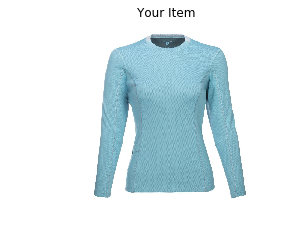

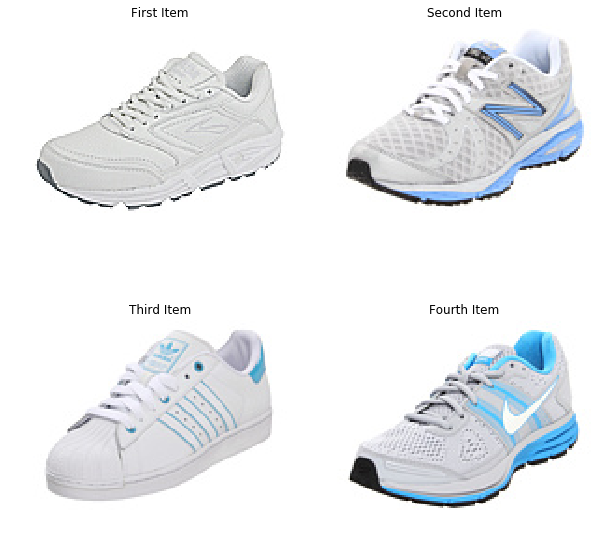

In [30]:
# image_file = '../data/clothing2/test/red_short_dresses/red_short_dresses40.jpg'
image_file = '/Users/maileivargas/Desktop/test14.jpg'
tensor = path_to_tensor(image_file)
# get_recommendations(tensor,nn_model=nn_top_shoe)
view_one_image(image_file)
view_nn_images(get_recommendations(tensor,nn_model=top_nn_shoe_euclid),0)

In [8]:
df = get_recommendations(tensor, nn_model = top_nn_shoe_euclid)
# view_nn_images(,0)
shoe_list = df.apply(lambda x: x.tolist(), axis=1)[0]
shoe_list = [x.replace('data', 'static') for x in shoe_list]
shoe_list

['../static/shoes/test/athletic/8029437.35968.jpg',
 '../static/shoes/train/athletic/7977902.1453.jpg',
 '../static/shoes/train/athletic/7925401.337485.jpg',
 '../static/shoes/train/athletic/7787388.287488.jpg']